# Drug Classification 💊💊💊💊💊🩺 

### Problèmes de jeu de données 🤔
👉 Ce jeu de données contient des informations sur la classification des médicaments en fonction des informations générales du patient et de son diagnostic. Un modèle d'apprentissage automatique est nécessaire pour prédire le type de médicament qui conviendrait le mieux au patient.

## 1- Prétraitement et visualisation des données

### 1-1 Prétraitement des données

#### importation des bibliothèques 📚 :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, f1_score, classification_report,accuracy_score





#### Lecture de l'ensemble de données 👓 :

In [2]:
df= pd.read_csv("drug200.csv")

#### Exploration des données  🔍:

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


#### Attribute Description 🧾:

In [4]:
df.shape

(200, 6)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


👉 Le jeu de données comporte 1 colonne de données de type flottant (float), 1 colonne de données de type entier (integer) et 4 colonnes de données de type objet (object).

In [6]:
#donne lestypes de données de chaque colonne dans le Dtaframe
df.dtypes 

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [7]:
# Vérification des valeurs manquantes :

df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

👉 Le jeu de données ne contient aucune valeur nulle (null).

In [8]:
# Vérification des doublons :

duplicate = df[df.duplicated()]
duplicate

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


In [12]:
# affiche les statistiques descriptives des variables numériques
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [13]:
print("L'âge minimum est de {} ans".format(df['Age'].min()))
print("L'âge maximum est de {} ans".format(df['Age'].max()))

L'âge minimum est de 15 ans
L'âge maximum est de 74 ans


In [14]:
#Trouver les valeurs uniques des attributs catégoriels
print("Sex:", df['Sex'].unique())
print("BP:", df['BP'].unique())
print("Cholesterol:", df['Cholesterol'].unique())
print("Drug:", df['Drug'].unique())

Sex: ['F' 'M']
BP: ['HIGH' 'LOW' 'NORMAL']
Cholesterol: ['HIGH' 'NORMAL']
Drug: ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


### 1-2 visualisation des données 📊

#### Répartition des types de Drug 💊

Text(0.5, 0, 'Drug')

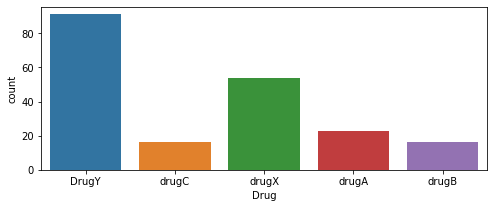

In [15]:
# Répartition des médicaments :

plt.figure(figsize = (8,3))
sns.countplot(x='Drug', data=df)
plt.xlabel('Drug')


👉 Observation :

Le médicament Y est administré à la plupart des patients, suivi du médicament X.
Le médicament A, le médicament B et le médicament C sont administrés à un nombre moins élevé de patients.

#### Répartition par genre 👫

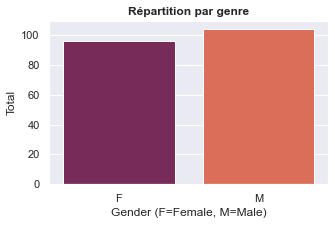

In [16]:
plt.figure(figsize = (5,3))
sns.set_theme(style="darkgrid")
sns.countplot(x="Sex", data=df, palette="rocket")


plt.xlabel('Gender (F=Female, M=Male)')
plt.title("Répartition par genre", fontsize=12, fontweight='bold')
plt.ylabel('Total')
plt.show()

#### Distribution de la pression artérielle (BP) 🩸

C:\Users\bochr\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129656 (\N{DROP OF BLOOD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


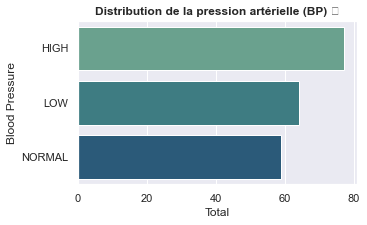

In [17]:
plt.figure(figsize = (5,3))
sns.set_theme(style="darkgrid")
sns.countplot(y="BP", data=df, palette="crest")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.title("Distribution de la pression artérielle (BP) 🩸", fontsize=12, fontweight='bold')
plt.show()

####  Distribution de la Cholesterol 🥛

C:\Users\bochr\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129371 (\N{GLASS OF MILK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


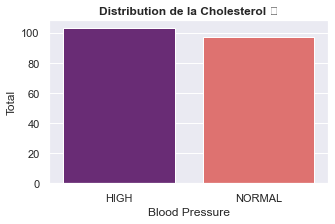

In [18]:
plt.figure(figsize = (5,3))
sns.set_theme(style="darkgrid")
sns.countplot(x="Cholesterol", data=df, palette="magma")
plt.xlabel('Blood Pressure')
plt.ylabel('Total')
plt.title("Distribution de la Cholesterol 🥛", fontsize=12, fontweight='bold')
plt.show()

#### Répartition par genre en fonction du type de Drug 👫💊

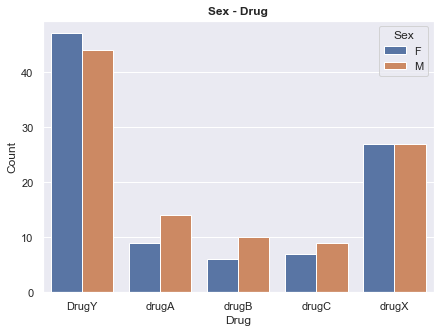

In [19]:
#Analyse des médicaments en fonction du sexe :

df_Sex_Drug = df.groupby(["Drug", "Sex"]).size().reset_index(name = "Count")

plt.figure(figsize = (7,5))
sns.barplot(x = "Drug", y = "Count", hue = "Sex", data = df_Sex_Drug)
plt.title("Sex - Drug", fontsize=12, fontweight='bold')
plt.show()

👉 Observation:-

Le médicament Y est donné à davantage de patients de sexe féminin.
Les médicaments A, B et C ne sont donnés qu'à davantage de patients de sexe masculin.
Le médicament X est donné de manière équitable aux patients de sexe masculin et féminin.

#### Distribution d'âge en fonction du type de Drug 👴💊

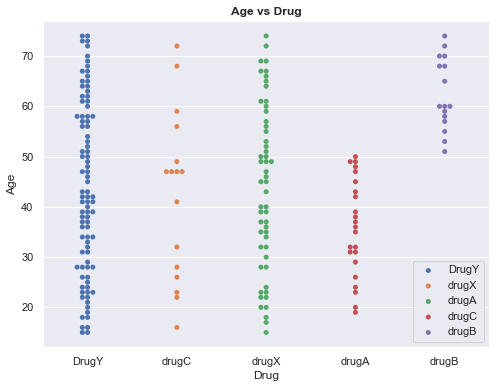

In [20]:
# Analyse des médicaments en fonction de l'âge :

plt.figure(figsize = (8,6))
sns.swarmplot(x = "Drug", y = "Age", data = df)
plt.legend(df.Drug.value_counts().index)
plt.title("Age vs Drug", fontsize=12, fontweight='bold')
plt.show()

👉 Observation :

Le médicament A est administré uniquement aux patients âgés de 20 à 50 ans.
Le médicament B est administré uniquement aux patients de plus de 50 ans.
Le médicament Y, le médicament C et le médicament X peuvent être administrés à tous les groupes d'âge.

#### Distribution du ratio Sodium-Potassium en fonction du type de Drug  🧪💊

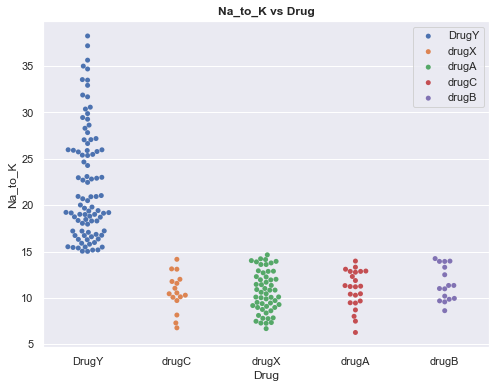

In [21]:
#Analyse des médicaments en fonction de Na_to_K :

plt.figure(figsize = (8,6))
sns.swarmplot(x = "Drug", y = "Na_to_K", data = df)
plt.legend(df.Drug.value_counts().index)
plt.title("Na_to_K vs Drug", fontsize=12, fontweight='bold')
plt.show()

👉 Observation :

Le médicament Y est administré uniquement aux patients dont le ratio Na_to_K est supérieur à 15.
Le médicament C, le médicament X, le médicament A et le médicament B sont administrés aux patients dont le ratio Na_to_K est compris entre 5 et 15.

#### Distribution de la pression artérielle en fonction du type de Drug 💊🩸

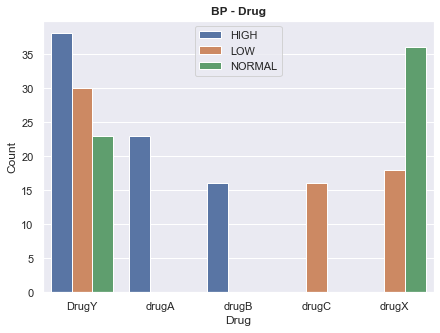

In [22]:
# Analyse des médicaments en fonction en BP

df_Sex_Drug = df.groupby(["Drug", "BP"]).size().reset_index(name = "Count")

plt.figure(figsize = (7,5))
sns.barplot(x = "Drug", y = "Count", hue = "BP", data = df_Sex_Drug)
plt.title("BP - Drug", fontsize=12
          , fontweight='bold')
plt.legend(loc='upper center')
plt.show()


👉 Observation :

Le médicament Y est administré à un plus grand nombre de patients ayant une pression artérielle élevée.
Le médicament A et le médicament B ne peuvent être administrés qu'aux patients ayant une pression artérielle élevée.
Le médicament C est administré uniquement aux patients ayant une pression artérielle basse.
Le médicament X est administré à un plus grand nombre de patients ayant une pression artérielle normale.

#### Distribution de Cholestérol selon le type de Drug 💊🥛

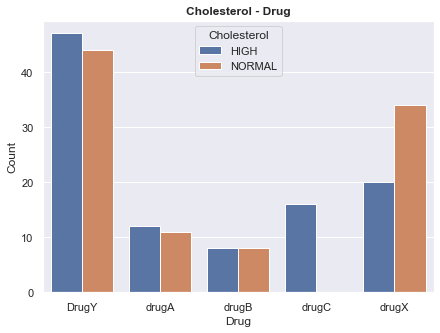

In [23]:
#Analyse des médicaments en fonction du cholestérol :

df_Sex_Drug = df.groupby(["Drug", "Cholesterol"]).size().reset_index(name = "Count")

plt.figure(figsize = (7,5))
sns.barplot(x = "Drug", y = "Count", hue = "Cholesterol", data = df_Sex_Drug)
plt.title("Cholesterol - Drug", fontsize=12, fontweight='bold')
plt.show()

👉 Observation :

Le médicament Y et le médicament A sont administrés à un plus grand nombre de patients dont le taux de cholestérol est élevé.
Le médicament B peut être administré aux patients dont le taux de cholestérol est élevé ou normal.
Le médicament C est administré uniquement aux patients ayant un taux de cholestérol élevé.
Le médicament X est administré à un plus grand nombre de patients dont le taux de cholestérol est normal.

#### Répartition du cholestérol selon le sexe 🥛👫

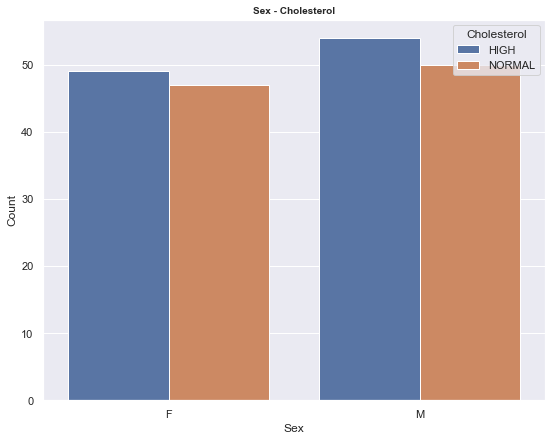

In [24]:
#Analyse du cholestérol en fonction du sexe

df_Sex_Cholesterol = df.groupby(["Sex", "Cholesterol"]).size().reset_index(name = "Count")

plt.figure(figsize = (9,7))
sns.barplot(x = "Sex", y = "Count", hue = "Cholesterol", data = df_Sex_Cholesterol)
plt.title("Sex - Cholesterol", fontsize=10, fontweight='bold')
plt.show()

👉 Observation : On observe que les femmes et les hommes souffrent tous deux de niveaux élevés de cholestérol.

#### Distribution de la pression artérielle en fonction du sexe👫🩸

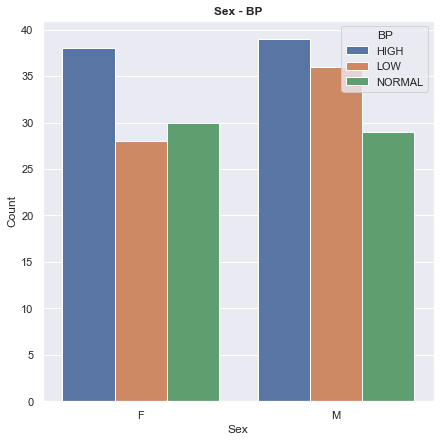

In [25]:
#Analyse de la tension artérielle (BP) en fonction du sexe

df_Sex_BP = df.groupby(["Sex", "BP"]).size().reset_index(name = "Count")

plt.figure(figsize = (7,7))
sns.barplot(x = "Sex", y = "Count", hue = "BP", data = df_Sex_BP)
plt.title("Sex - BP", fontsize=12, fontweight='bold')
plt.show()

👉 Observation :

Les femmes et les hommes souffrent tous deux de niveaux élevés de tension artérielle.
Plus d'hommes souffrent d'hypertension artérielle que de femmes.
Presque autant d'hommes que de femmes ont une tension artérielle normale.

#### Distribution du sodium au potassium en fonction du genre et de l'âge🧪👫👴

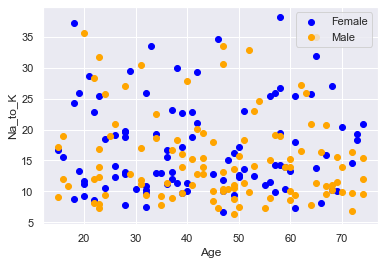

In [26]:
plt.scatter(x=df.Age[df.Sex=='F'], y=df.Na_to_K[(df.Sex=='F')], c="Blue")
plt.scatter(x=df.Age[df.Sex=='M'], y=df.Na_to_K[(df.Sex=='M')], c="Orange")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

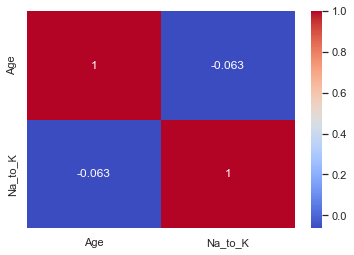

In [27]:
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True) # affiche une carte de chaleur pour la corrélation entre les variables
plt.show()

## 3- Préparation du jeu de données ⚙ :

### 3-2 Encodage des variables catégorielles 🔧 :

In [28]:
def label_encoder(x):
    le = LabelEncoder()
    df[x] = le.fit_transform(df[x])

lables = ['Sex', 'BP', 'Cholesterol', 'Drug']
for i in lables:
    label_encoder(i)

In [29]:
df  # base de données encode

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


 ### 3-1 Diviser l'ensemble de données🪓
👉 Le jeu de données sera divisé en 70% pour l'entraînement et 30% pour les tests.


In [ ]:
X = df.drop(["Drug"], axis = 1)    # independent variable

y = df.Drug.values    # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [57]:
from imblearn.over_sampling import RandomOverSampler
# Appliquer le sur-échantillonnage aléatoire sur l'ensemble d'entraînement
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Afficher les statistiques des classes de la variable cible après le sur-échantillonnage
print(pd.Series(y_train_resampled).value_counts())


ModuleNotFoundError: No module named 'imblearn'

In [ ]:
X_train.head()

In [ ]:
X_test.head()

## 4- Models 🛠 :

### 4-1 L'arbre de décision 

In [32]:
from sklearn import metrics
dtc = DecisionTreeClassifier()

# Fit the model
dtc.fit(X_train, y_train)

# Predict the x_test
predict = dtc.predict(X_test)



In [33]:
from sklearn import tree
text_representation = tree.export_text(dtc)
print(text_representation)

|--- feature_4 <= 14.84
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 53.00
|   |   |   |--- class: 1
|   |   |--- feature_0 >  53.00
|   |   |   |--- class: 2
|   |--- feature_2 >  0.50
|   |   |--- feature_2 <= 1.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 3
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 4
|   |   |--- feature_2 >  1.50
|   |   |   |--- class: 4
|--- feature_4 >  14.84
|   |--- class: 0



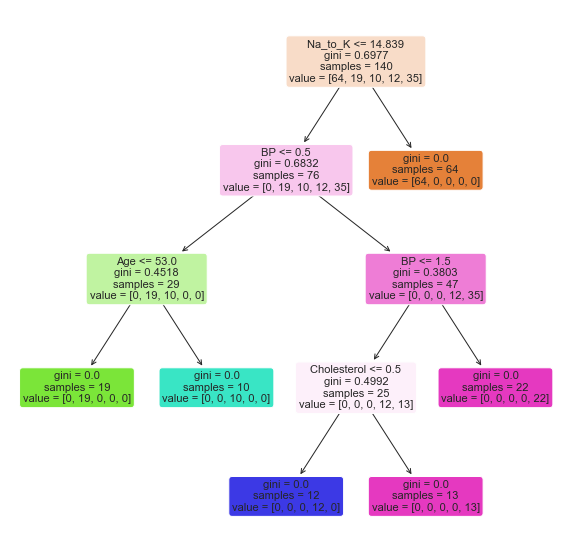

In [34]:
# Visualiser le graphe
plt.figure(figsize = (10,10))
dec_tree = plot_tree(decision_tree=dtc , feature_names = df.columns, filled = True , precision = 4, rounded = True)


In [35]:
#évaluation 
print(confusion_matrix(y_test,predict))

DAcc = accuracy_score(predict,y_test)
print('accuracy de l''arbre de décision .: {0:0.4f}'.format(DAcc*100))


[[27  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  2  4  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 19]]
accuracy de larbre de décision .: 96.6667


In [36]:
DTC_gini = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=1)


# Entraîner le modèle
DTC_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

Ce code crée un objet DecisionTreeClassifier avec un critère de fractionnement 'gini', une profondeur maximale de l'arbre de décision de 3 et un générateur de nombres aléatoires initialisé à 0.

In [37]:
y_pred_gini = DTC_gini.predict(X_test)

In [38]:
#évaluation 
print(classification_report(y_test,y_pred_gini))

DAGcc = accuracy_score(y_pred_gini,y_test)
print('Score de précision du modèle avec l"indice de critère gini.: {0:0.4f}'.format(DAGcc*100))




              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.67      1.00      0.80         4
           2       1.00      0.67      0.80         6
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        19

    accuracy                           0.97        60
   macro avg       0.93      0.93      0.92        60
weighted avg       0.98      0.97      0.97        60

Score de précision du modèle avec l"indice de critère gini.: 96.6667


In [39]:
# instancier le modèle DecisionTreeClassifier avec le critère entropy
DTC_en = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)


# Entraîner le modèle
DTC_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

 Nous instancions le modèle DecisionTreeClassifier avec le critère 'entropy' et une profondeur maximale de 3

In [40]:
y_pred_en = DTC_en.predict(X_test)

In [41]:
#évaluation
print(classification_report(y_test,y_pred_en))


DAEcc = accuracy_score(y_pred_en,y_test)
print('Model accuracy score with criterion entropy:: {:.2f}%'.format(DAEcc*100))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.67      1.00      0.80         4
           2       1.00      0.67      0.80         6
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        19

    accuracy                           0.97        60
   macro avg       0.93      0.93      0.92        60
weighted avg       0.98      0.97      0.97        60

Model accuracy score with criterion entropy:: 96.67%


### 4-2 forêt aléatoire (Random Forest)

In [42]:
# sans ajustement des hyperparamètres

clf1 = RandomForestClassifier(random_state=42)
accuracies = cross_val_score(clf1, X_train, y_train, cv=5)
clf1.fit(X_train, y_train)

print("Train Score:", np.mean(accuracies))
print("Test Score:", clf1.score(X_test, y_test))

Train Score: 0.9857142857142858
Test Score: 0.95


 un modèle de classification de forêt aléatoire (Random Forest) sans ajuster les hyperparamètres du modèle. Le modèle est entraîné sur les données d'entraînement (X_train et y_train) en utilisant la fonction cross_val_score pour effectuer une validation croisée à 5 plis.

In [43]:
# Predicting values

y_pred1 = clf1.predict(X_test)
y_pred1

array([4, 0, 4, 3, 0, 4, 4, 0, 0, 0, 4, 3, 0, 0, 1, 1, 4, 4, 2, 0, 4, 4,
       4, 0, 2, 4, 4, 0, 4, 4, 3, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 4,
       2, 0, 4, 4, 0, 1, 0, 0, 0, 0, 0, 0, 4, 4, 4, 1])

In [44]:
print(classification_report(y_test, y_pred1))
RfAcc1 = accuracy_score(y_pred1,y_test)
print('Random forst accuracy  is: {:.2f}%'.format(RfAcc1*100))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.67      1.00      0.80         4
           2       1.00      0.67      0.80         6
           3       1.00      0.75      0.86         4
           4       0.95      1.00      0.97        19

    accuracy                           0.95        60
   macro avg       0.92      0.88      0.89        60
weighted avg       0.96      0.95      0.95        60

Random forst accuracy  is: 95.00%


In [45]:
cm = confusion_matrix(y_test, y_pred1)
cm

array([[27,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0],
       [ 0,  2,  4,  0,  0],
       [ 0,  0,  0,  3,  1],
       [ 0,  0,  0,  0, 19]], dtype=int64)

In [46]:
# utilise la méthode de recherche par grille (GridSearchCV)
grid = {'n_estimators': np.arange(1, 100), 'criterion':['gini','entropy']}

clf2 = RandomForestClassifier(random_state=42)
clf2_cv = GridSearchCV(clf2, grid, cv=5)
clf2_cv.fit(X_train, y_train)

print("Hyperparameters Used:", clf2_cv.best_params_)
print("Train Score:", np.mean(accuracies))
print("Test Score:", clf2_cv.score(X_test, y_test))

Hyperparameters Used: {'criterion': 'gini', 'n_estimators': 34}
Train Score: 0.9857142857142858
Test Score: 0.9666666666666667


Ce code utilise la recherche par grille pour ajuster les hyperparamètres du modèle de classification de forêt aléatoire. Les hyperparamètres ajustés sont les nombres d'estimateurs et les critères. Le modèle est entraîné avec les meilleurs paramètres et son score de précision est évalué sur les données de test.

In [47]:
y_pred2 = clf2_cv.predict(X_test)
y_pred2

array([4, 0, 4, 3, 0, 4, 4, 0, 0, 0, 4, 3, 0, 0, 1, 1, 4, 4, 2, 0, 4, 4,
       4, 0, 2, 4, 4, 0, 4, 4, 3, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 4,
       2, 0, 4, 4, 0, 2, 0, 0, 0, 0, 0, 0, 4, 4, 4, 1])

In [48]:

print(classification_report(y_test, y_pred2))
RfAcc2 = accuracy_score(y_pred2,y_test)
print('Random forst accuracy  is: {:.2f}%'.format(RfAcc2*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.80      1.00      0.89         4
           2       1.00      0.83      0.91         6
           3       1.00      0.75      0.86         4
           4       0.95      1.00      0.97        19

    accuracy                           0.97        60
   macro avg       0.95      0.92      0.93        60
weighted avg       0.97      0.97      0.97        60

Random forst accuracy  is: 96.67%


In [49]:
cm = confusion_matrix(y_test, y_pred1)
cm

array([[27,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0],
       [ 0,  2,  4,  0,  0],
       [ 0,  0,  0,  3,  1],
       [ 0,  0,  0,  0, 19]], dtype=int64)

Le classificateur de forêt aléatoire affiche une précision de 100% avec et sans l'ajustement des hyperparamètres.

### 4-3 Naive Bayes

 ### Gaussian NB

In [50]:

NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85        27
           1       0.50      1.00      0.67         4
           2       1.00      0.83      0.91         6
           3       0.50      1.00      0.67         4
           4       1.00      1.00      1.00        19

    accuracy                           0.87        60
   macro avg       0.80      0.91      0.82        60
weighted avg       0.93      0.87      0.88        60

[[20  3  0  4  0]
 [ 0  4  0  0  0]
 [ 0  1  5  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 19]]
Gaussian Naive Bayes accuracy is: 86.67%


### 4 KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        27
           1       0.29      0.50      0.36         4
           2       1.00      0.17      0.29         6
           3       0.00      0.00      0.00         4
           4       0.56      0.53      0.54        19

    accuracy                           0.67        60
   macro avg       0.54      0.44      0.42        60
weighted avg       0.69      0.67      0.64        60

[[27  0  0  0  0]
 [ 0  2  0  0  2]
 [ 1  0  1  1  3]
 [ 1  0  0  0  3]
 [ 2  5  0  2 10]]
K Neighbours accuracy is: 66.67%


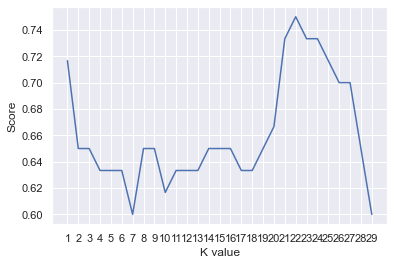

KNN Acc Max 75.00%


In [52]:
scoreListknn = []
for i in range(1,30):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,30), scoreListknn)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAccMax = max(scoreListknn)
print("KNN Acc Max {:.2f}%".format(KNAccMax*100))

### 5 Support Vector Machine (SVM)

In [53]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.80      1.00      0.89         4
           2       1.00      0.83      0.91         6
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        19

    accuracy                           0.98        60
   macro avg       0.96      0.97      0.96        60
weighted avg       0.99      0.98      0.98        60

[[27  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  1  5  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 19]]
SVC accuracy is: 98.33%


C:\Users\bochr\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=251).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


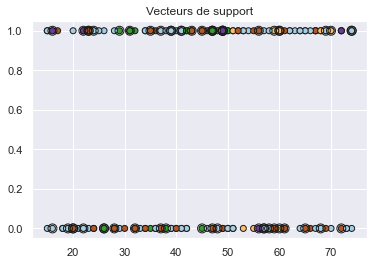

In [54]:
support_vectors = SVCclassifier.support_vectors_
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=80, facecolors='none', edgecolors='k')
plt.title('Vecteurs de support')
plt.show()

In [55]:
# Entraînement du modèle SVM avec noyau gaussien (RBF)
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = svm.predict(X_test)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7166666666666667


 ## 5-Comparaison des modèles 👀

In [56]:
compare = pd.DataFrame({'Model': [ 'Decision Tree','Decision Tree entropy','Decision Tree gini ','Random Forest', 'Random Forest Max', 'Gaussian NB','KNN','SVM' ], 
                        'Accuracy': [DAcc*100, DAEcc*100, DAGcc*100, RfAcc1*100, RfAcc2*100, NBAcc2*100,KNAccMax*100,SVCAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
7,SVM,98.333333
0,Decision Tree,96.666667
1,Decision Tree entropy,96.666667
2,Decision Tree gini,96.666667
4,Random Forest Max,96.666667
3,Random Forest,95.000000
5,Gaussian NB,86.666667
6,KNN,75.000000
